### Ejemplo de Regresión Lineal Múltiple
Predecir el precio de una casa (precio) basado en:

- metros_cuadrados.
- habitaciones.
- antiguedad (años).

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

##### Crear datos

In [12]:
np.random.seed(42) # Esto permite que los datos random sean siempre los mismos
n = 1000 # Número de datos

data = pd.DataFrame({
    'metros_cuadrados': np.random.uniform(40, 200, n).round(0),
    'habitaciones': np.random.randint(1, 6, n),
    'antiguedad': np.random.uniform(0, 40, n).round(0)
})

# Agregamos el Precio conformado por: base + m² + hab - antigüedad + ruido
data['precio'] = (
    50000 + 
    data['metros_cuadrados'] * 1200 + 
    data['habitaciones'] * 8000 - 
    data['antiguedad'] * 600 + 
    np.random.normal(0, 15000, n)
)

# Redondear
data['precio'] = data['precio'].round(0).astype(int)

print(f"\nEstadísticas:")
print()
print(data.describe().round(1))

data.head()


Estadísticas:

       metros_cuadrados  habitaciones  antiguedad    precio
count            1000.0        1000.0      1000.0    1000.0
mean              118.4           3.0        20.2  204738.0
std                46.7           1.4        11.7   59450.8
min                41.0           1.0         0.0   73770.0
25%                77.8           2.0        10.0  154091.8
50%               119.5           3.0        21.0  205037.5
75%               159.0           4.0        30.0  250153.5
max               200.0           5.0        40.0  343880.0


,metros_cuadrados,habitaciones,antiguedad,precio
0,100.0,4,20.0,154365
1,192.0,3,15.0,304374
2,157.0,5,18.0,256175
3,136.0,1,9.0,220448
4,65.0,5,36.0,145958


##### Visualización exploratoria

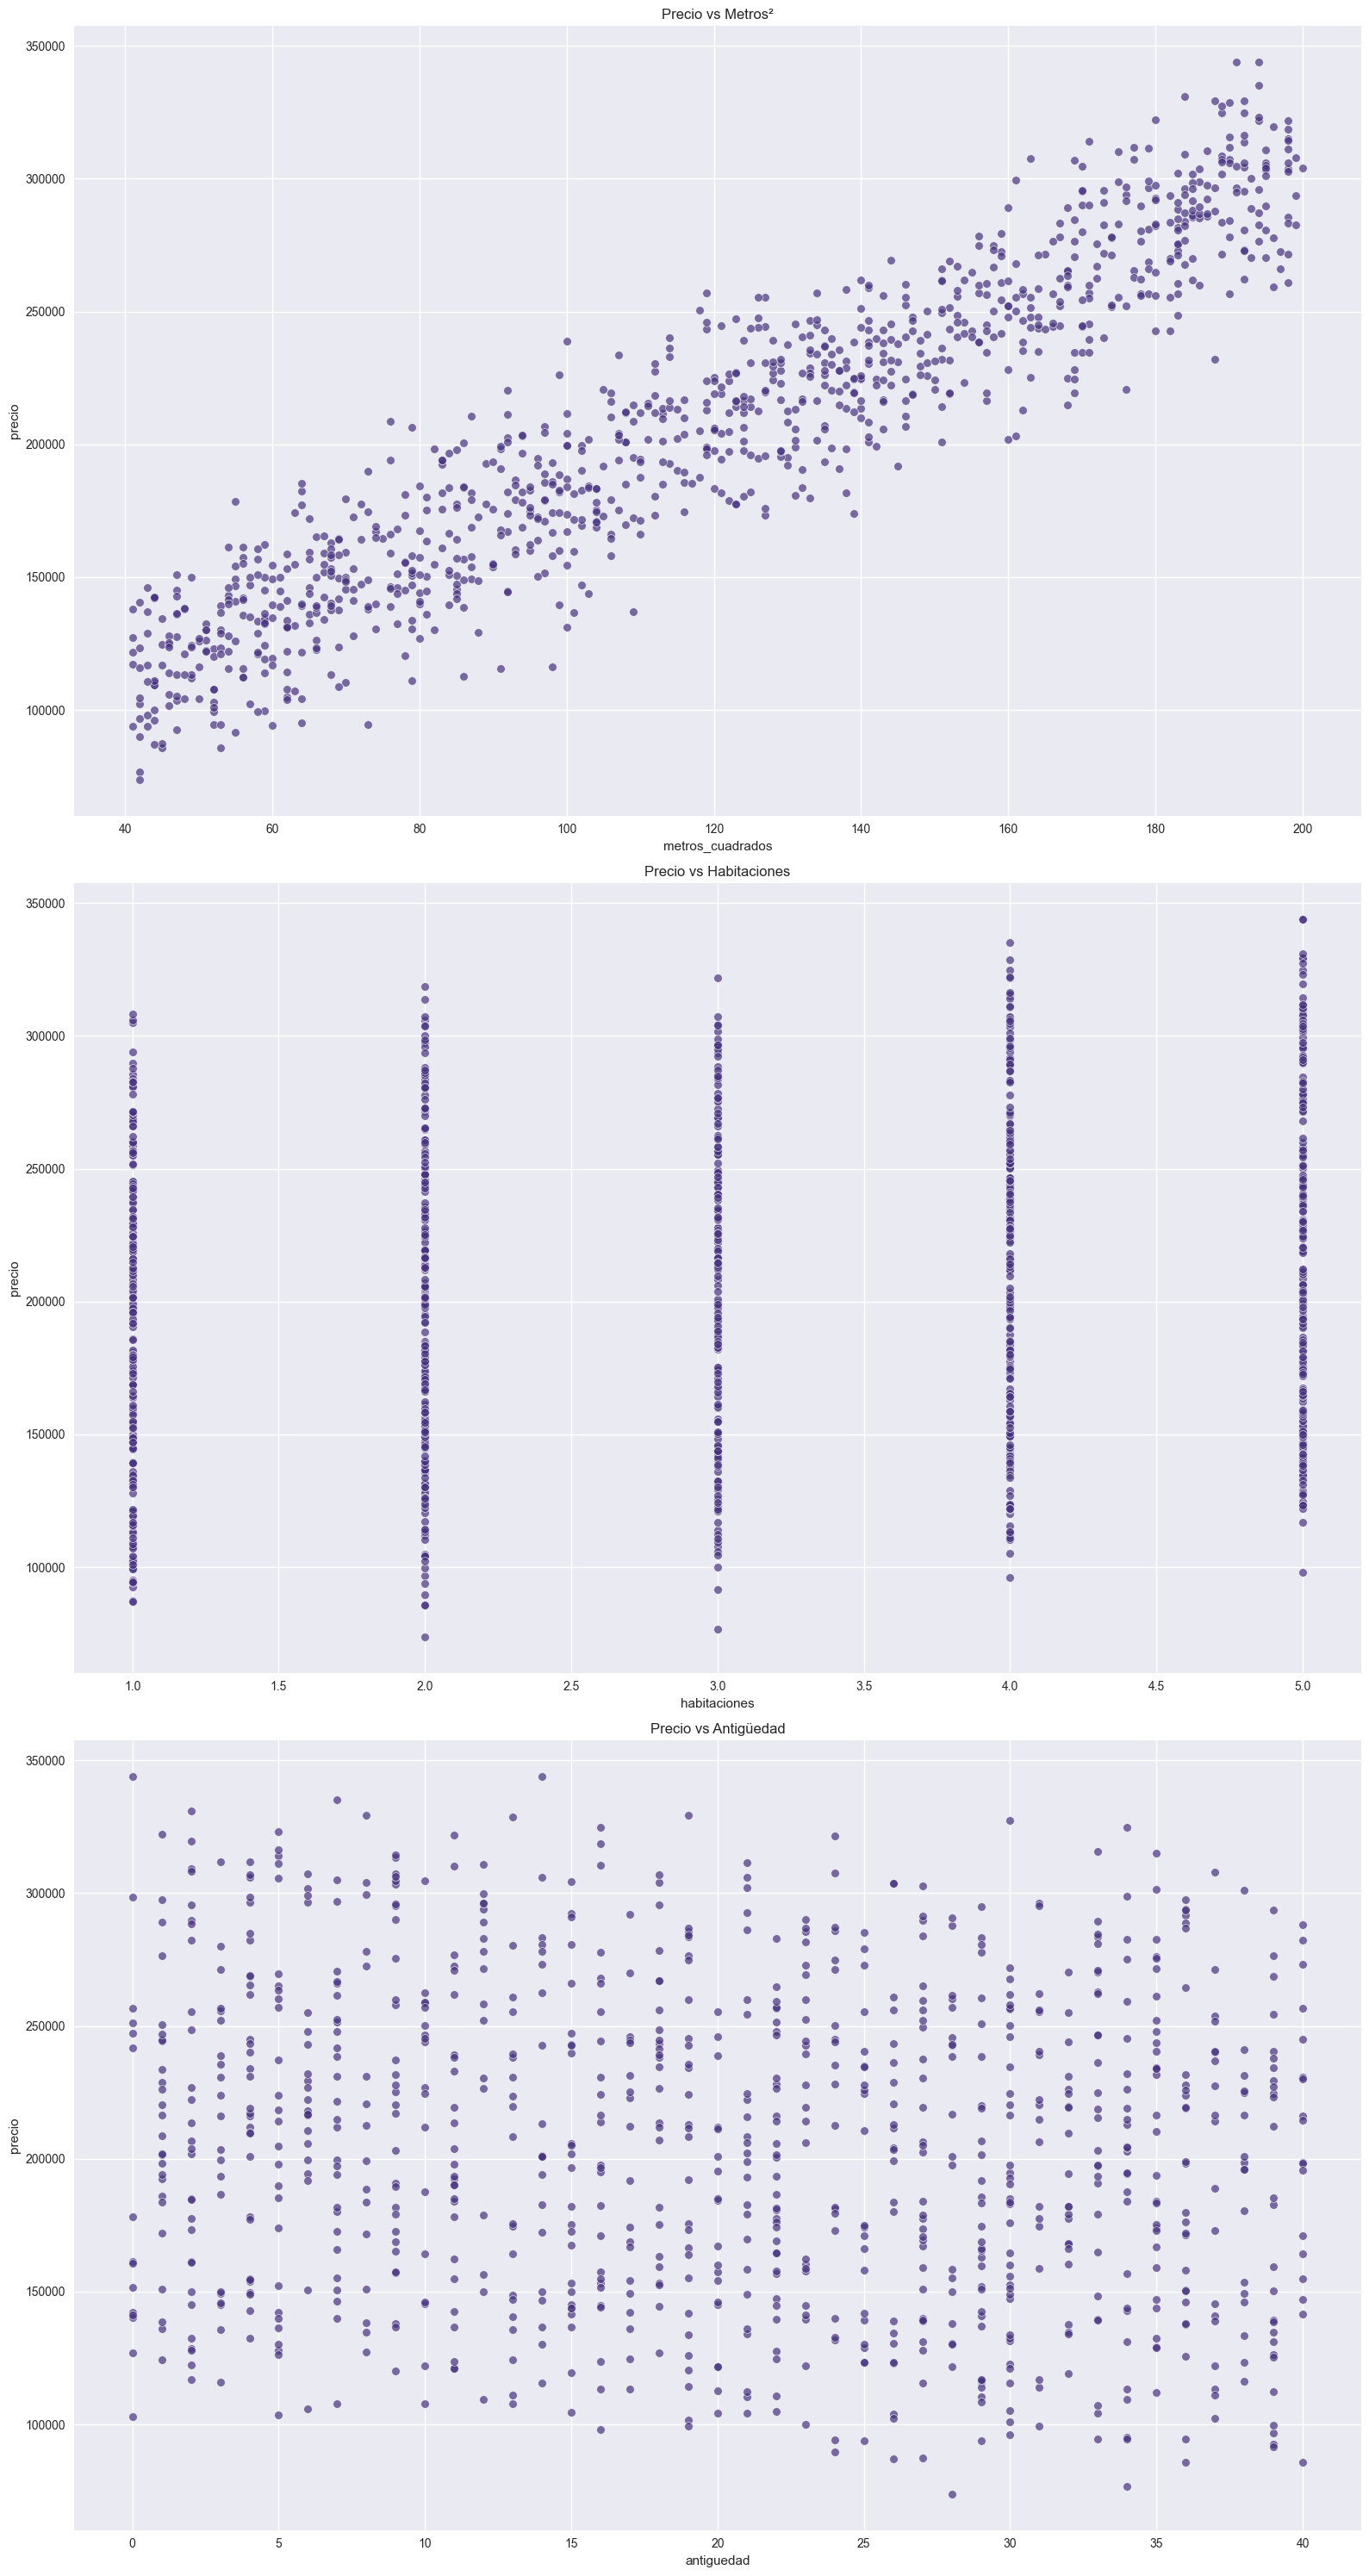

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(16, 30))

sns.scatterplot(data=data, x='metros_cuadrados', y='precio', ax=axes[0], alpha=0.7)
axes[0].set_title("Precio vs Metros²")

sns.scatterplot(data=data, x='habitaciones', y='precio', ax=axes[1], alpha=0.7)
axes[1].set_title("Precio vs Habitaciones")

sns.scatterplot(data=data, x='antiguedad', y='precio', ax=axes[2], alpha=0.7)
axes[2].set_title("Precio vs Antigüedad")

plt.tight_layout()
plt.show()

##### Matriz de correlación

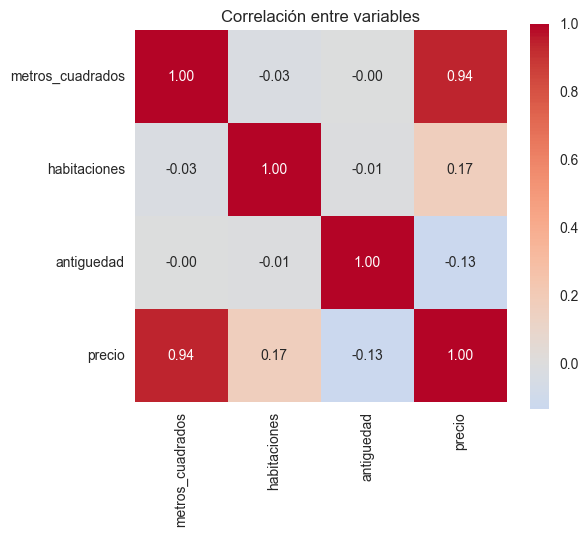

In [14]:
plt.figure(figsize=(6,5))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title("Correlación entre variables")
plt.show()

##### Preparar datos de entrenamiento y pruebas

In [17]:
X = data[['metros_cuadrados', 'habitaciones', 'antiguedad']] # Variables predictoras o independientes
y = data['precio'] # Variable objetivo

# Estandarizar (opcional, pero mejora interpretación)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # test_size es el tamaño del test

##### Visualización de train/test split: precio vs m2

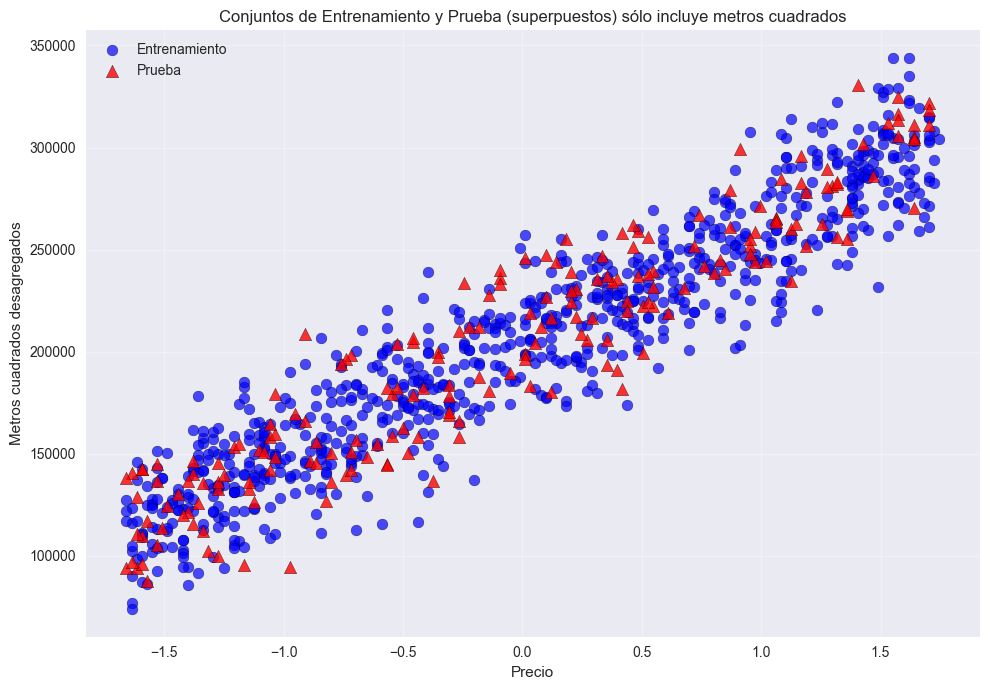

In [18]:
# Crear el scatter plot
plt.figure(figsize=(10, 7))

# Puntos de ENTRENAMIENTO (azules, círculo)
plt.scatter(X_train[:, 0], y_train, 
            color='blue', label='Entrenamiento', alpha=0.7, s=60, edgecolors='k')

# Puntos de PRUEBA (rojos, triángulo)
plt.scatter(X_test[:, 0], y_test, 
            color='red', label='Prueba', marker='^', alpha=0.8, s=80, edgecolors='k')

# Etiquetas y título
plt.xlabel('Precio')
plt.ylabel('Metros cuadrados desagregados')
plt.title('Conjuntos de Entrenamiento y Prueba (superpuestos) sólo incluye metros cuadrados')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### Entrenar modelo

In [20]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print()
print("Coeficientes:")
print("-------------")
for var, coef in zip(['metros_cuadrados', 'habitaciones', 'antiguedad'], modelo.coef_):
    print(f"  {var}: {coef:,.1f}")

print()
print(f"Intercepto: {modelo.intercept_:,.0f}")


Coeficientes:
-------------
  metros_cuadrados: 55,707.6
  habitaciones: 11,397.1
  antiguedad: -7,528.1

Intercepto: 204,371


![](img/coeficientes.png)

##### Prueba del modelo

In [21]:
y_pred = modelo.predict(X_test)

##### Evaluación del Modelo

=== MÉTRICAS DE REGRESIÓN ===
MAE  (Error absoluto medio). En promedio se equivoca por: $11,652
MSE  (Error cuadrático medio). Castiga más los errores grandes → útil para optimizar: $219,981,496
RMSE (Raíz del error cuadrático). En promedio se equivoca por: $14,832 (penaliza errores grandes)
R²   (Cuánto explica el modelo en % la variación del precio): 0.940 → 94.0%


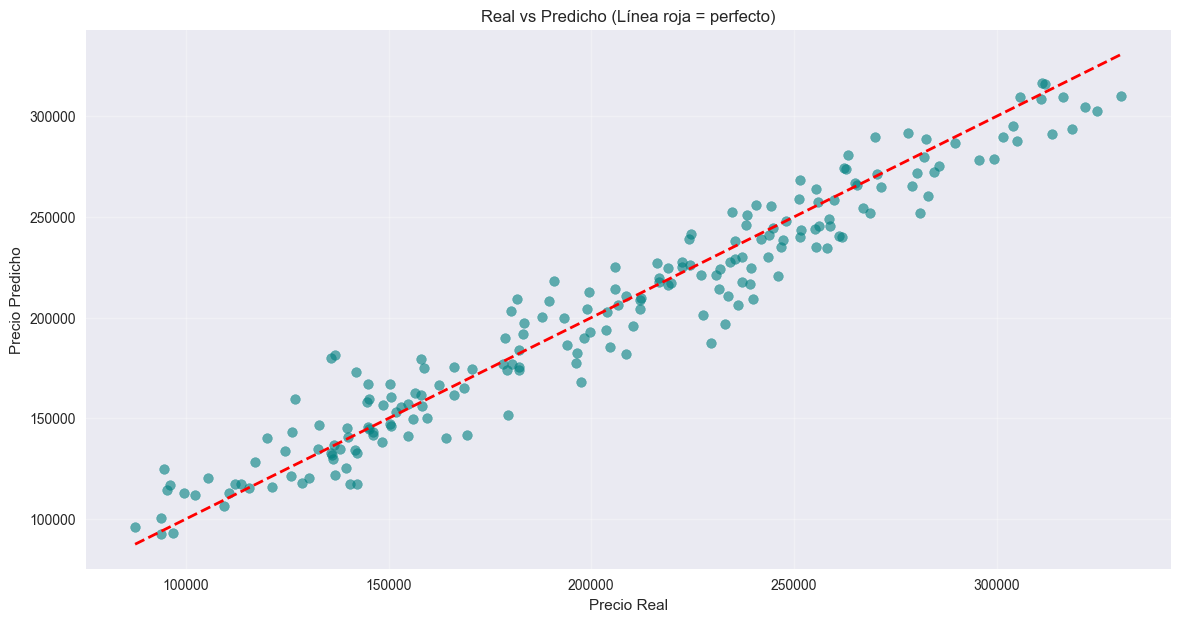

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== MÉTRICAS DE REGRESIÓN ===")
print(f"MAE  (Error absoluto medio). En promedio se equivoca por: ${mae:,.0f}")
print(f"MSE  (Error cuadrático medio). Castiga más los errores grandes → útil para optimizar: ${mse:,.0f}")
print(f"RMSE (Raíz del error cuadrático). En promedio se equivoca por: ${rmse:,.0f} (penaliza errores grandes)")
print(f"R²   (Cuánto explica el modelo en % la variación del precio): {r2:.3f} → {r2*100:.1f}%")

# Gráfico real vs predicho
plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Real vs Predicho (Línea roja = perfecto)")
plt.grid(True, alpha=0.3)
plt.show()

##### Predecir un nuevo precio

In [ ]:
nueva_casa = pd.DataFrame({
    'metros_cuadrados': [92],
    'habitaciones': [3],
    'antiguedad': [50]
})

nueva_scaled = scaler.transform(nueva_casa)
prediccion = modelo.predict(nueva_scaled)[0]

print(f"\nCasa de 85 m², 3 habitaciones, 12 años de antigüedad:")
print(f"Precio predicho: ${prediccion:,.0f}")


Casa de 85 m², 3 habitaciones, 12 años de antigüedad:
Precio predicho: $153,362
